# Exploratory Data Analysis (EDA)
## Parental Education and Math Abilities

This notebook explores the relationship between parental socio-educational background
(parental education and classroom characteristics) and children's math-related cognitive
abilities using correlation analysis and visualization.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../main_dataset.csv")
df.head()

,Unnamed: 0,participant_id,age_ses-T1,age_ses-T2,sex,handedness,T1w_date,Syllogisms_run-01_date,Syllogisms_run-02_date,Transitive_run-01_date,...,WASI_BD_T-Score_t2,WASI_Sim_Raw_t2,WASI_Sim_T-Score_t2,WASI_MR_Raw_t2,WASI_MR_T-Score_t2,WASI_VIQ_t2,WASI_PIQ_t2,WASI_FSIQ_t2,WJ-III_MathFluency_Raw_t2,WJ-III_MathFluency_StS_t2
0,0,sub-002,9.23,11.28,female,right,2009-08-25,2009-09-14,2009-09-14,2009-09-14,...,67.0,34.0,66.0,31.0,67.0,127.0,131.0,133.0,56.0,84.0
1,1,sub-003,10.68,NaN,female,right,2009-07-17,2010-09-03,2010-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,sub-004,9.93,NaN,female,right,2011-02-24,2011-03-03,2011-03-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,sub-005,11.98,14.34,male,right,2009-10-02,2009-12-18,2009-12-18,2009-12-18,...,54.0,40.0,67.0,30.0,58.0,125.0,109.0,119.0,134.0,119.0
4,4,sub-006,8.90,11.14,female,right,2010-09-26,2011-01-01,2011-01-01,2011-01-01,...,55.0,20.0,40.0,28.0,61.0,88.0,112.0,100.0,79.0,105.0


## Variable Selection

To explore the relationship between socio-educational background and math abilities,
we selected a subset of variables from the dataset.

The analysis focuses on two main groups of variables:

**Socio-educational background variables**
- Parental education level (mother and father)
- School type
- Regular classroom status

**Math-related cognitive variables**
- CMAT Basic Calculation Quotient
- KeyMath sub-scores (Numeration, Measurement, Problem Solving)
- WJ-III Math Fluency score

These variables were chosen to reflect both environmental background factors
and core mathematical performance measures.

In [10]:
# --- Select background (socio-educational) variables ---
background_vars = [
    "mother_highest_grade",
    "father_highest_grade",
    "school_type",
    "regular_classroom"
]

# --- Select math-related cognitive variables ---
math_vars = [
    "CMAT_BasicCalc_Comp_Quotient",
    "KeyMath_Numeration_ScS",
    "KeyMath_Measurement_ScS",
    "KeyMath_ProblemSolving_ScS",
    "WJ-III_MathFluency_StS"
]


In [11]:
# Keep only relevant columns
eda_df = df[background_vars + math_vars].copy()

# Display basic info
print(eda_df.info())
print(eda_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mother_highest_grade          54 non-null     float64
 1   father_highest_grade          48 non-null     float64
 2   school_type                   56 non-null     object 
 3   regular_classroom             55 non-null     float64
 4   CMAT_BasicCalc_Comp_Quotient  56 non-null     int64  
 5   KeyMath_Numeration_ScS        56 non-null     int64  
 6   KeyMath_Measurement_ScS       56 non-null     int64  
 7   KeyMath_ProblemSolving_ScS    56 non-null     int64  
 8   WJ-III_MathFluency_StS        56 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 4.1+ KB
None
       mother_highest_grade  father_highest_grade  regular_classroom  \
count             54.000000             48.000000          55.000000   
mean               3.888889           

## Data Preparation

Before computing correlations, several background variables require preprocessing.
Parental education variables are ordinal, and classroom status is categorical.
Therefore, selected variables will be converted to numeric format where appropriate,
and non-numeric variables will be handled separately in the analysis.

In [12]:
# -------------------------
# Correlations (numeric only)
# -------------------------

# Convert background education columns to numeric (safe)
for col in ["mother_highest_grade", "father_highest_grade", "regular_classroom"]:
    eda_df[col] = pd.to_numeric(eda_df[col], errors="coerce")

# Numeric columns for correlation (exclude school_type because it's categorical text)
numeric_cols = [c for c in eda_df.columns if c != "school_type"]

# Correlation matrix
corr = eda_df[numeric_cols].corr(method="spearman")  # spearman is robust for ordinal scales
print("\nSpearman correlation matrix (numeric vars):")
print(corr.round(2))


Spearman correlation matrix (numeric vars):
                              mother_highest_grade  father_highest_grade  \
mother_highest_grade                          1.00                  0.56   
father_highest_grade                          0.56                  1.00   
regular_classroom                             0.10                  0.25   
CMAT_BasicCalc_Comp_Quotient                  0.23                  0.39   
KeyMath_Numeration_ScS                        0.19                  0.41   
KeyMath_Measurement_ScS                       0.22                  0.54   
KeyMath_ProblemSolving_ScS                    0.32                  0.57   
WJ-III_MathFluency_StS                        0.05                  0.15   

                              regular_classroom  CMAT_BasicCalc_Comp_Quotient  \
mother_highest_grade                       0.10                          0.23   
father_highest_grade                       0.25                          0.39   
regular_classroom          

## Correlation Analysis

To examine associations between socio-educational background variables
and math-related cognitive measures, Spearman correlation coefficients were computed.

Spearman correlation was selected because several background variables are ordinal
and do not necessarily meet normality assumptions. The correlation matrix below
provides an overview of the strength and direction of relationships between
background characteristics and math performance measures.

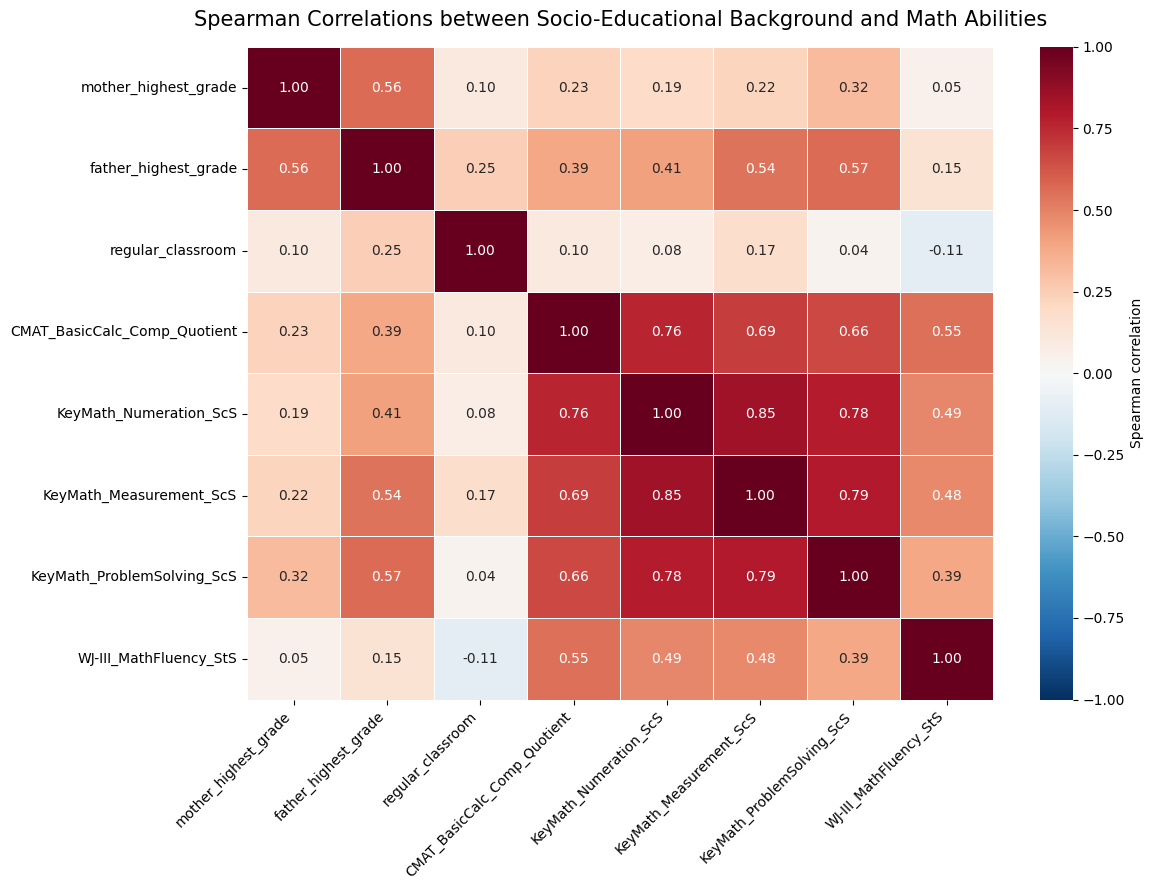

In [15]:
plt.figure(figsize=(12, 9))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"size": 10},
    cbar_kws={"label": "Spearman correlation"}
)

plt.title(
    "Spearman Correlations between Socio-Educational Background and Math Abilities",
    fontsize=15,
    pad=15
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## Preliminary Insights

The exploratory analysis reveals several notable patterns.
Parental education levels, particularly father’s education, show moderate positive
associations with multiple math achievement measures.
In contrast, regular classroom status exhibits weak or negligible correlations
with math performance.

Strong correlations are observed among the different math-related measures,
indicating consistency across assessment tools.
Overall, these findings suggest that socio-educational background may be related
to mathematical abilities, supporting further investigation using multivariate
statistical models.